# Data preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

Loading data from pandas library

In [ ]:
data = pd.read_csv('student-performance-predictor-dataset.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


First of all needed to check if dataset contains with null values

In [ ]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Then the author needed to take a look at the data distribution before start the implementing.

<AxesSubplot:xlabel='Count', ylabel='gender'>

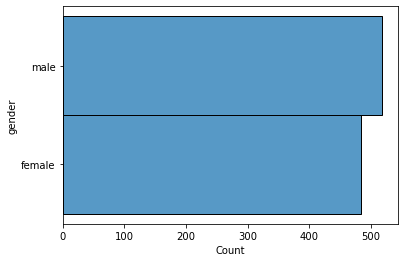

In [ ]:
sb.histplot(y=data['gender'])

*Both male and female participant data are equally distibuted*

<AxesSubplot:ylabel='writing score'>

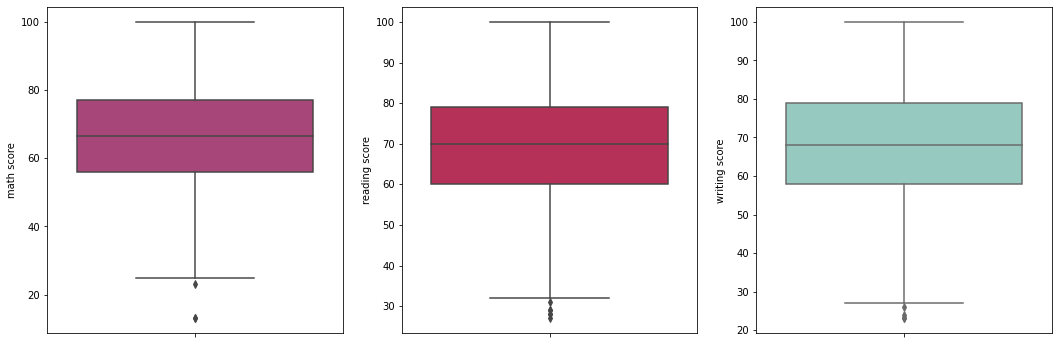

In [ ]:
ax = plt.subplots(nrows=1 , ncols= 3 , figsize=(18,6))

#Math score plot
ax = plt.subplot(1,3,1)
sb.boxplot(y = data['math score'], ax=ax, palette='magma',)

#Reading score plot
ax = plt.subplot(1,3,2)
sb.boxplot(y = data['reading score'], ax=ax, palette='rocket',)

#Writing score plot
ax = plt.subplot(1,3,3)
sb.boxplot(y = data['writing score'], ax=ax, palette='Set3',)

*Most of score from math, reading and writing are located in 60-80 range.*

Some of these data needed to be prepared in a specific manner in order to conduct the implementation.

Needed to imporing lable encoder in order to data pre-processing. By the help of the lable encoder the strings from the data are converted to code in order to be read by the algorithm.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['gender']=le.fit_transform(data['gender'])
data['race/ethnicity']=le.fit_transform(data['race/ethnicity'])
data['parental level of education']=le.fit_transform(data['parental level of education'])
data['lunch']=le.fit_transform(data['lunch'])
data['test preparation course']=le.fit_transform(data['test preparation course'])
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,2,1,0,67,67,63
1,0,3,5,0,1,40,59,55
2,1,4,4,0,1,59,60,50
3,1,1,2,1,1,77,78,68
4,1,4,0,1,0,78,73,68


After converting data to machine-readable form, needed to define the independent variables and dependent variables. The author decided to predict the writing score according to students' gender, race/ethnicity, parent level of education, lunch, test preparation course status, and reading & math scores. Based on that,

*   *Independent variable* – Writing score
*   *Dependent variables* – Gender, race/ethnicity, parent level of education, lunch, test preparation course status, and reading & math scores

In [ ]:
indp_var=data[['gender','race/ethnicity','parental level of education','lunch','test preparation course','reading score', 'math score']]
dep_var=data['writing score']

Here is the devided dependent variable data

In [ ]:
dep_var

0      63
1      55
2      50
3      68
4      68
       ..
995    65
996    92
997    41
998    82
999    62
Name: writing score, Length: 1000, dtype: int64

Here is the devided independent variable data

In [ ]:
indp_var

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,math score
0,1,0,2,1,0,67,67
1,0,3,5,0,1,59,40
2,1,4,4,0,1,60,59
3,1,1,2,1,1,78,77
4,1,4,0,1,0,73,78
...,...,...,...,...,...,...,...
995,1,2,2,1,1,70,73
996,1,3,0,0,0,91,85
997,0,2,5,0,1,35,32
998,0,2,4,1,1,74,73


Then dataset is needed to be spilt into two in order to train and test the model. After spilling 30% of the data as the test dataset, the rest of the 70% data can be used for the implementation process.
By importing relevent libraries from sklearn, the author can split data to train data and the test data.

In [ ]:
from sklearn.model_selection import train_test_split
indp_var_train,indp_var_test,dep_var_train,dep_var_test=train_test_split(indp_var,dep_var,test_size=0.3,random_state=0)

Here is the splited independent and dependent test and train data sizes

In [ ]:
indp_var_test.shape

(300, 7)

In [ ]:
dep_var_test.shape

(300,)

In [ ]:
indp_var_train.shape

(700, 7)

In [ ]:
dep_var_train.shape

(700,)

# Data modeling

the author can start the modeling by *creating* the regression model instance

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100,random_state = 1)
rf

RandomForestRegressor(random_state=1)

Fitting model with train data set in order to train the model

In [ ]:
rf.fit(indp_var_train, dep_var_train)

RandomForestRegressor(random_state=1)

Getting predicted dependent variable values (Writing scores) based on independent variables (Gender, Race/ethnicity, ...) from test data

In [ ]:
dep_var_pred = rf.predict(indp_var_test)
print(dep_var_pred)

[53.9        85.28       58.52       62.33       43.11       49.45
 63.3        72.5        60.08       97.43       33.17       71.5
 81.21       76.97       68.87       62.39       82.26       53.46
 86.84       86.78       73.63       81.37       69.61       54.71
 79.23       60.96       45.89       64.5        66.53       56.15
 65.19       59.87       72.54       77.19       46.59       90.03
 51.52       58.96       63.52       73.47       87.01       86.7
 85.35       77.66       64.71       60.47       71.49       74.85
 67.69       92.34       89.37       79.14       56.19       72.16
 79.26       70.31       69.15       70.97       74.63       86.11833333
 74.15       62.38       87.49       62.25       60.15       48.51
 81.1        70.09       61.14       45.46       71.22       42.28
 46.76       65.33       66.2        56.54       77.58       85.92
 71.43       61.48       46.78       89.11       54.49       75.22
 66.94       56.24       66.89       86.02       62.34    

# Evaluation and Testing

In oder to test the model the author needed to compare expected exam score against the predicted exam score.

In [ ]:
print('Expected exam scores', dep_var_test)

Expected exam scores 993    58
859    79
298    50
553    66
672    45
       ..
167    68
998    82
984    75
491    76
10     85
Name: writing score, Length: 300, dtype: int64


In [ ]:
print('Predicted exam scores', dep_var_pred)

Predicted exam scores [53.9        85.28       58.52       62.33       43.11       49.45
 63.3        72.5        60.08       97.43       33.17       71.5
 81.21       76.97       68.87       62.39       82.26       53.46
 86.84       86.78       73.63       81.37       69.61       54.71
 79.23       60.96       45.89       64.5        66.53       56.15
 65.19       59.87       72.54       77.19       46.59       90.03
 51.52       58.96       63.52       73.47       87.01       86.7
 85.35       77.66       64.71       60.47       71.49       74.85
 67.69       92.34       89.37       79.14       56.19       72.16
 79.26       70.31       69.15       70.97       74.63       86.11833333
 74.15       62.38       87.49       62.25       60.15       48.51
 81.1        70.09       61.14       45.46       71.22       42.28
 46.76       65.33       66.2        56.54       77.58       85.92
 71.43       61.48       46.78       89.11       54.49       75.22
 66.94       56.24       66.89      

When comparing an expected and correct values, take look at the first five data rows from each actual writing exam scores from test data and predicted exam scores from test data.

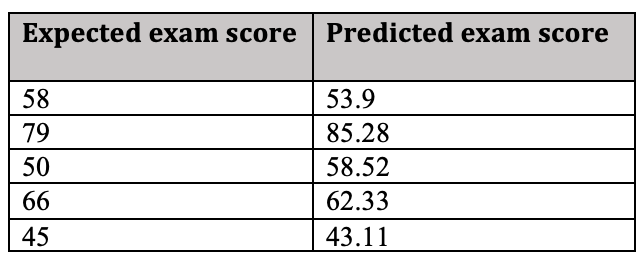

# Evaluate results

As a regression, Random Forest can evaluate by following factors.

*   **Explained variance score**
*   **Mean absolute error (MAE)**
*   **R2 score**
*   **Accuracy**

By using sklearn.metrics library the author can calculate mentioned metrics according to the trained model.

In [ ]:
import sklearn.metrics as sm

print('Explained variance score : ', round(sm.explained_variance_score(dep_var_test, dep_var_pred),3))
print('Mean Absolute Error (MAE) : ', round(sm.mean_absolute_error(dep_var_test, dep_var_pred),3))
print('R2 score : ', round(sm.r2_score(dep_var_test, dep_var_pred),3))
mape = np.mean(np.abs((dep_var_test - dep_var_pred) / np.abs(dep_var_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 3))
print('Accuracy : ', round(100*(1 - mape), 2),'%')

Explained variance score :  0.912
Mean Absolute Error (MAE) :  3.596
R2 score :  0.911
Mean Absolute Percentage Error (MAPE): 5.673
Accuracy :  94.33 %


*   **Explained variance score** – trained model has a value of 0.91 of explained variance score. Since this value is way closer to 1.0, the author can assume that the model delivers a good prediction.

*   **Mean absolute error (MAE)** – trained model has a value of 3.59 of MAE. This explains that predicted output value can be increase by 3.59 or decrease by 3.59. As an example, when predicted writing exam score is 80, the real writing exam score can be 76.41 (80-3.59) or can be 83.59 (80+3.59).

*   **R2 score** – trained model has a value of 0.91 of R2 score. Since this value is way closer to 1.0, the author can assume that the model delivers a near perfect prediction.

*   **Accuracy** - trained model has a 94.33% accuracy. So, the author also can assume that the model delivers a near perfect prediction.


Considering the MAE predicted exam scores can deviate from 3,59. Following table represents the deviated predicted values. 

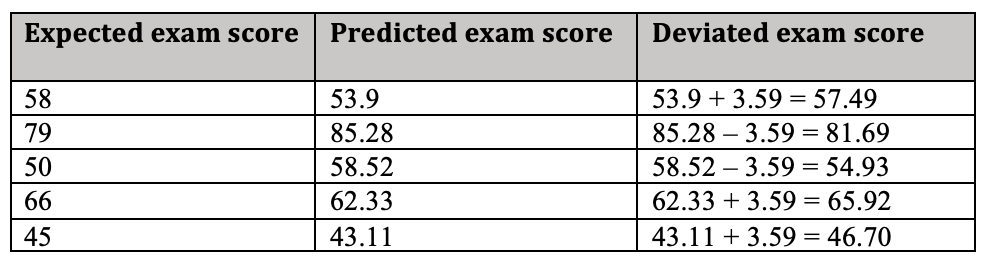

Since the Random Forest Regression is based on a bunch of decision trees, time complexity, and space complexity can be reached to a higher value. But the final outcome will be more accurate sinceusing the most voted method on decision tree results. 
So, the implemented model can predict a most accurate writing exam result and the predicted result can be use to evaluate student performance. Administators or teachers can conduct a student cented education system based on predicted exam score from this implemeted model.